In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import os
import glob
sns.set_context('paper', font_scale=3)
sns.set_style('white')

Populating the interactive namespace from numpy and matplotlib


In [2]:
tool_colors = {'ribocop': '#e41a1c',
               'ribocode': '#377eb8',
               'ribotaper': '#4daf4a',
               'orfscore': '#984ea3',
               'riborf': '#ff7f00',#ffff33
               'ribowave': '#a65628',
               'rpbp': '#f781bf'#999999
}

KEY_TO_KEY = {'ribocop': 'RiboCop',
             'ribocode': 'RiboCode',
             'riborf': 'RibORF',
             'rpbp': 'RP-BP',
             'ribowave': 'RiboWave'}

In [44]:
mouse_SRP = ['SRP003554', 'SRP062407', 'SRP078005', 'SRP091889', 'SRP115915']
human_SRP = ['SRP010679', 'SRP029589', 'SRP063852', 'SRP098789', 'SRP102021']

In [5]:
def get_runtime(filename):
    df = pd.read_table(filename)
    return df['s'].tolist()[0]

In [43]:
sheet_name = 'mm10'
excel_df = pd.read_excel('../../ribocop-results/data/datasets_info.xlsx', sheet_name=sheet_name)
input_dir_root = '/home/cmb-panasas2/wenzhenl/benchmark/gene_level/mm10/'
output_dir_root = '/home/cmb-06/as/skchoudh/benchmark-ribocop/benchmark/gene_level/mm10/'
mm_run_times = []
benchmarks = {'riborf': 'time_benchmarks/riboORF_benchmark/run_ribORF/', # 'RNA.txt'
             'rpbp': 'rpbp_results/time_benchmarks/rpbp/run_rpbp', #'RNA_CCDS_lengths.txt'
             'ribowave': 'time_benchmarks/Ribowave/ribowave/', # 'RNA_CCDS_lengths.txt'
              'ribocop': 'time_benchmarks/ribocop/predict_orfs/', # 'RNA_CCDS_lengths.txt'
             }

for index, row in excel_df.iterrows():
    srp = row['SRA']
    if srp not in mouse_SRP:
        continue
    input_dir = os.path.join(input_dir_root, srp+'_mouse')
    output_dir = os.path.join(output_dir_root, srp+'_mouse')
   
    if not os.path.exists(input_dir):
        continue
    for key, location in benchmarks.items():
        for f in glob.glob(os.path.join(output_dir, location, '*.txt')):
            runtime = get_runtime(f)
            file_type = f.split('/')[-1].replace('_CCDS_lengths', '').replace('.txt', '')
            if file_type == 'RIBO_CCDS':
                # Skip these as they are same as RIBO_CCDS_lengths
                continue
            file_type = file_type.lower()
            
            if file_type == 'ribo':
                srx = row['RIBO sample']
            else:
                srx = row['RNA sample']
            if runtime < 30:
                # Sample didn't run
                continue
            mm_run_times.append([srp, srx, key,  file_type, runtime, 'mouse'])
                           
        
    
mm_df = pd.DataFrame(mm_run_times, columns=['SRP', 'SRX', 'tool', 'file_type', 'runtime', 'species']).sort_values(by=['SRP', 'tool', 'file_type'])
mm_df_ribo = mm_df[mm_df.file_type=='ribo'].reset_index(drop=True)
mm_df_ribo

,SRP,SRX,tool,file_type,runtime,species
0,SRP003554,SRX026871,ribocop,ribo,3456.9948,mouse
1,SRP003554,SRX026871,riborf,ribo,17580.7919,mouse
2,SRP003554,SRX026871,ribowave,ribo,8264.1819,mouse
3,SRP003554,SRX026871,rpbp,ribo,6751.4425,mouse
4,SRP062407,SRX1149649,ribocop,ribo,4909.9906,mouse
5,SRP062407,SRX1149649,riborf,ribo,11098.7922,mouse
6,SRP062407,SRX1149649,ribowave,ribo,8594.3024,mouse
7,SRP062407,SRX1149649,rpbp,ribo,23563.7476,mouse
8,SRP078005,SRX1900396,ribocop,ribo,2876.7261,mouse
9,SRP078005,SRX1900396,riborf,ribo,10172.7864,mouse


In [53]:
excel_df = pd.read_excel('../../ribocop-results/data/datasets_info.xlsx', sheet_name='hg38')

input_dir_root = '/home/cmb-panasas2/wenzhenl/benchmark/gene_level/hg38/'
output_dir_root = '/staging/as/skchoudh/benchmark/gene_level/hg38/'
hg_run_times = []
benchmarks = {'riborf': 'time_benchmarks/riboORF_benchmark/run_ribORF/', # 'RNA.txt'
             'rpbp': 'rpbp_results/time_benchmarks/rpbp/run_rpbp', #'RNA_CCDS_lengths.txt'
             'ribowave': 'time_benchmarks/Ribowave/ribowave/', # 'RNA_CCDS_lengths.txt'
              'ribocop': 'time_benchmarks/ribocop/predict_orfs/', # 'RNA_CCDS_lengths.txt'
             }

for index, row in excel_df.iterrows():
    srp = row['SRA']
    if srp not in human_SRP:
        #print(srp)
        continue
    input_dir = os.path.join(input_dir_root, srp+'_human')
    output_dir = os.path.join(output_dir_root, srp+'_human')
   
    if not os.path.exists(input_dir):
        print('missing: {}'.format(input_dir))
        continue
    for key, location in benchmarks.items():
        for f in glob.glob(os.path.join(output_dir, location, '*.txt')):
            #print(f)
            runtime = get_runtime(f)
            file_type = f.split('/')[-1].replace('_CCDS_lengths', '').replace('.txt', '')
            if file_type == 'RIBO_CCDS':
                # Skip these as they are same as RIBO_CCDS_lengths
                continue
            if file_type == 'ribo':
                srx = row['RIBO sample']
            else:
                srx = row['RNA sample']
            file_type = file_type.lower()
            if runtime < 30:
                continue
            hg_run_times.append([srp, srx, key,  file_type, runtime, 'human'])
                           
        
hg_df = pd.DataFrame(hg_run_times, columns=['SRP', 'SRX', 'tool', 'file_type', 'runtime', 'species']).sort_values(by=['SRP', 'tool', 'file_type'])
hg_df_ribo = hg_df[hg_df.file_type=='ribo'].reset_index()
hg_df_ribo

,index,SRP,SRX,tool,file_type,runtime,species
0,7,SRP010679,SRX118285,ribocop,ribo,1551.1518,human
1,0,SRP010679,SRX118285,riborf,ribo,13883.0207,human
2,4,SRP010679,SRX118285,ribowave,ribo,15826.3932,human
3,3,SRP010679,SRX118285,rpbp,ribo,9491.3812,human
4,14,SRP029589,SRX345311,ribocop,ribo,1662.1468,human
5,9,SRP029589,SRX345311,riborf,ribo,18057.8412,human
6,12,SRP029589,SRX345311,ribowave,ribo,15975.7912,human
7,10,SRP029589,SRX345311,rpbp,ribo,6638.7839,human
8,23,SRP063852,"SRX426378 (SRP028887, GSE49831)",ribocop,ribo,2119.1684,human
9,17,SRP063852,"SRX426378 (SRP028887, GSE49831)",riborf,ribo,17268.0334,human


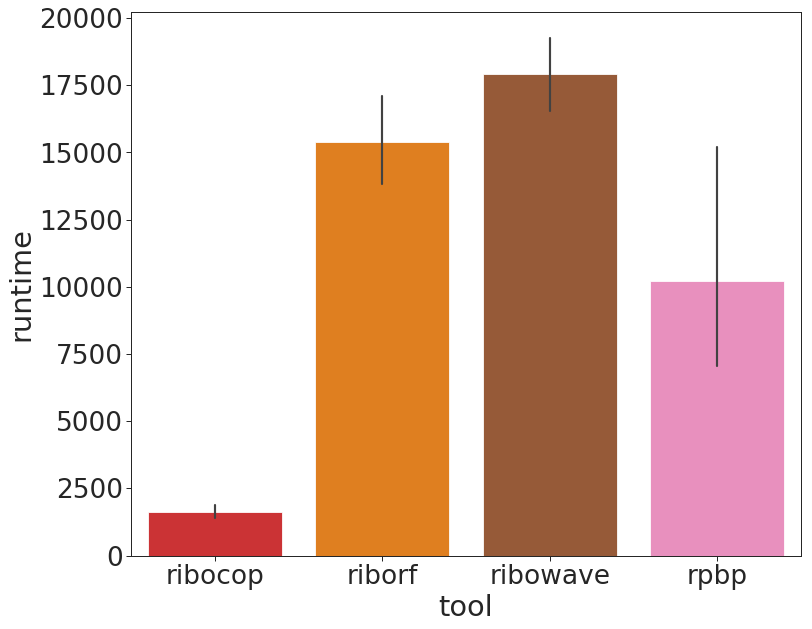

In [73]:
sns.set_context('paper', font_scale=3)
sns.set_style('white')
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 50})

fig, ax = plt.subplots(figsize=(12,10))
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 50})

sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 50})

sns.barplot(data=hg_df_ribo, x='tool', y='runtime', palette=tool_colors, ax=ax)
fig.savefig

In [57]:
combined_df = pd.concat([hg_df, mm_df], ignore_index=True)
combined_df.to_csv('../time-benchmark/runtimes.tsv', sep='\t', header=True, index=False)
print(combined_df.to_latex())

\begin{tabular}{lllllrl}
\toprule
{} &        SRP &                              SRX &      tool & file\_type &     runtime & species \\
\midrule
0  &  SRP010679 &                        SRX118285 &   ribocop &      ribo &   1551.1518 &   human \\
1  &  SRP010679 &                        SRX118285 &   ribocop &       rna &   1280.6263 &   human \\
2  &  SRP010679 &                        SRX118285 &    riborf &      ribo &  13883.0207 &   human \\
3  &  SRP010679 &                        SRX118285 &    riborf &       rna &  22754.0182 &   human \\
4  &  SRP010679 &                        SRX118285 &  ribowave &      ribo &  15826.3932 &   human \\
5  &  SRP010679 &                        SRX118285 &  ribowave &       rna &  15475.4261 &   human \\
6  &  SRP010679 &                        SRX118285 &      rpbp &      ribo &   9491.3812 &   human \\
7  &  SRP010679 &                        SRX118285 &      rpbp &       rna &   3137.9700 &   human \\
8  &  SRP029589 &                     

In [63]:
combined_df_rna = combined_df[combined_df.file_type=='rna'][['SRP', 'SRX', 'tool', 'species', 'runtime']]
combined_df_rna['runtime'] = np.ceil(combined_df_rna.runtime)
combined_df_rna['runtime'] = combined_df_rna['runtime'].astype(int)
print(combined_df_rna.to_latex(index=False))


\begin{tabular}{llllr}
\toprule
       SRP &                              SRX &      tool & species &  runtime \\
\midrule
 SRP010679 &                        SRX118285 &   ribocop &   human &     1281 \\
 SRP010679 &                        SRX118285 &    riborf &   human &    22755 \\
 SRP010679 &                        SRX118285 &  ribowave &   human &    15476 \\
 SRP010679 &                        SRX118285 &      rpbp &   human &     3138 \\
 SRP029589 &                        SRX345311 &   ribocop &   human &     1824 \\
 SRP029589 &                        SRX345311 &    riborf &   human &    14075 \\
 SRP029589 &                        SRX345311 &  ribowave &   human &    18053 \\
 SRP029589 &                        SRX345311 &      rpbp &   human &     7801 \\
 SRP063852 &  SRX426378 (SRP028887, GSE49831) &   ribocop &   human &      765 \\
 SRP063852 &  SRX426378 (SRP028887, GSE49831) &    riborf &   human &    14276 \\
 SRP063852 &  SRX426378 (SRP028887, GSE49831) &  ribowave

In [64]:
combined_df_ribo = combined_df[combined_df.file_type=='ribo'][['SRP', 'SRX', 'tool', 'species', 'runtime']]
combined_df_ribo['runtime'] = np.ceil(combined_df_ribo.runtime)
combined_df_ribo['runtime'] = combined_df_ribo['runtime'].astype(int)
print(combined_df_ribo.to_latex(index=False))


\begin{tabular}{llllr}
\toprule
       SRP &                              SRX &      tool & species &  runtime \\
\midrule
 SRP010679 &                        SRX118285 &   ribocop &   human &     1552 \\
 SRP010679 &                        SRX118285 &    riborf &   human &    13884 \\
 SRP010679 &                        SRX118285 &  ribowave &   human &    15827 \\
 SRP010679 &                        SRX118285 &      rpbp &   human &     9492 \\
 SRP029589 &                        SRX345311 &   ribocop &   human &     1663 \\
 SRP029589 &                        SRX345311 &    riborf &   human &    18058 \\
 SRP029589 &                        SRX345311 &  ribowave &   human &    15976 \\
 SRP029589 &                        SRX345311 &      rpbp &   human &     6639 \\
 SRP063852 &  SRX426378 (SRP028887, GSE49831) &   ribocop &   human &     2120 \\
 SRP063852 &  SRX426378 (SRP028887, GSE49831) &    riborf &   human &    17269 \\
 SRP063852 &  SRX426378 (SRP028887, GSE49831) &  ribowave

In [71]:
combined_df_ribo.pivot(index=['SRP', 'SRX', 'species'], columns=['tool'], values=['runtime'])

ValueError: Shape of passed values is (1, 38), indices imply (1, 3)

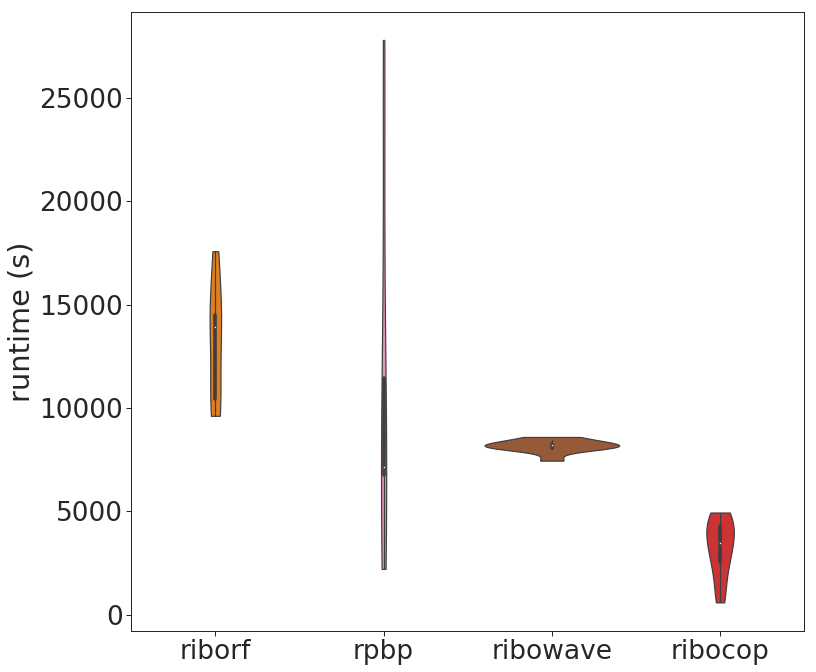

In [8]:
sns.set_context('paper', font_scale=3)
sns.set_style('white')
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 50})

fig, ax = plt.subplots(figsize=(12,10))
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 50})

sns.violinplot(data=df, x='tool', y='runtime', palette=tool_colors, ax=ax, legend=False, cut=0)
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 50})

#sns.despine(ax=ax, offset=50, trim=True)
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 50})
ax.set_ylabel('runtime (s)')
ax.set_xlabel('')
fig.tight_layout()
#fig.savefig('../../ribocop-results/notebooks/results/run_time_dist.pdf')

In [31]:
colors

<function matplotlib.pyplot.colors()>